# Core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| export
import pandas as pd
import numpy as np
import seaborn as sns
import logomaker
from fastbook import *

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
class Data:
    """
    A class for fetching various datasets.
    """
    
    # Kinase info
    KINASE_INFO_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/STkinase_info.csv"
    KINASE_ESM_RAW_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm.csv"
    KINASE_ESM_PCA_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm_pca32.csv"
    
    KINASE_T5_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_uniref50.csv"
    
    # Amino acid info
    AA_INFO_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_info.csv"
    AA_FEATURE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_rdkit.csv"
    
    # Target info
    RAW_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_raw.csv"
    NORM_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_norm.csv"

    # Unstacked target
    STANDARD_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_standard.csv"
    LOG_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_log.csv"
    
    # Stacked target
    STANDARD_STACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pivot_standard.csv"
    LOG_STACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pivot_log.csv"
    
    def __init__(self):
        pass
    
    @staticmethod
    def get_kinase_raw():
        """
        Fetches the supplementary Table 2 "ser_thr_all_raw_matrices" from the nature paper: 
        An atlas of substrate specificities for the human serine/threonine kinome.
        """
        df = pd.read_csv(Data.RAW_KINASE_URL)
        df = df.rename(columns={'Unnamed: 0': 'kinase'})
        return df
    
    
    @staticmethod
    def get_kinase_norm():
        """
        Fetches the supplementary Table 2 "ser_thr_all_norm_matrices" from the nature paper: 
        An atlas of substrate specificities for the human serine/threonine kinome.
        """
        df = pd.read_csv(Data.NORM_KINASE_URL)
        df = df.rename(columns={'Unnamed: 0': 'kinase'})
        return df
    
    
    @staticmethod
    def get_kinase_info():
        """
        Fetches the supplementary Table 1 from the nature paper with additional sequence info
        """
        df = pd.read_csv(Data.KINASE_INFO_URL)
        return df
    
    @staticmethod
    def get_esm():
        """
        Fetches the esm embeddings of kinase
        """
        df = pd.read_csv(Data.KINASE_ESM_RAW_URL)
        return df
    
    @staticmethod
    def get_esm_pca32():
        """
        Fetches the esm embeddings of kinase
        """
        df = pd.read_csv(Data.KINASE_ESM_PCA_URL)
        return df
    
    @staticmethod
    def get_t5():
        """
        Fetches the esm embeddings of kinase
        """
        df = pd.read_csv(Data.KINASE_T5_URL)
        return df
    
    @staticmethod
    def get_aa_info():
        """
        Fetches the amino acid info
        """
        df = pd.read_csv(Data.AA_INFO_URL)
        return df
    
    @staticmethod
    def get_aa_feature():
        """
        Fetches the 72 rdkit features of a.a. (after removing features with Pearson >0.9)
        """
        df = pd.read_csv(Data.AA_FEATURE_URL)
        return df
    
    
    
    @staticmethod
    def get_standard_unstack():
        """
        Fetches the unstacked standardized raw data
        """
        df = pd.read_csv(Data.STANDARD_UNSTACK_URL)
        return df
    
    @staticmethod
    def get_log_unstack():
        """
        Fetches the log transformed raw data.
        """
        df = pd.read_csv(Data.LOG_UNSTACK_URL)
        return df
    
    @staticmethod
    def get_log_stack():
        """
        Fetches the stacked log transformed raw data.
        """
        df = pd.read_csv(Data.LOG_STACK_URL)
        return df
    
        
    @staticmethod
    def get_standard_stack():
        """
        Fetches the stacked standardized raw data
        """
        df = pd.read_csv(Data.STANDARD_STACK_URL)
        return df

In [ ]:
df = Data.get_kinase_raw()

In [ ]:
df2 = Data.get_kinase_norm()

In [ ]:
df

,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
0,AAK1,7.614134e+06,2.590563e+06,3.001315e+06,4.696631e+06,4.944312e+06,8.315838e+06,1.005654e+07,1.643306e+07,1.049974e+07,9.133578e+06,4.493054e+06,1.006273e+07,3.327455e+06,3.504743e+06,2.767294e+06,1.010574e+07,5.923673e+06,2.909153e+06,1.695156e+06,1.617849e+06,2.128670e+06,2.128670e+06,6.460995e+06,5.260313e+06,6.325834e+06,6.957994e+06,5.369435e+06,5.713921e+06,6.612202e+06,6.093662e+06,6.120309e+06,7.306988e+06,6.829678e+06,5.119222e+06,5.263236e+06,3.974771e+06,5.065008e+06,7.968511e+06,7.041049e+06,6.174444e+06,4.228327e+06,3.271231e+06,5.511934e+06,3.267818e+06,3.267818e+06,3.338570e+06,8.921287e+06,4.210323e+06,9.202468e+06,5.247518e+06,6.741480e+06,6.810878e+06,5.271476e+06,4.928032e+06,4.337562e+06,6.432257e+06,4.006022e+06,3.383022e+06,3.493591e+06,3.269350e+06,4.253144e+06,4.777087e+06,5.719014e+06,4.787112e+06,2.233865e+06,3.045337e+06,2.489664e+06,2.489664e+06,2.253600e+06,2.216029e+06,2.766177e+06,5.269960e+06,5.606488e+06,5.715777e+06,8.442377e+06,3.330816e+06,3.699660e+06,5.573758e+06,1.141874e+07,3.289922e+06,3.904724e+06,2.831768e+06,5.548345e+06,5.749699e+06,5.431821e+06,1.485362e+07,7.911792e+06,7.877661e+06,6.228872e+06,2.050311e+06,2.050311e+06,4.757609e+06,1.274357e+07,7.922826e+06,4.320089e+06,3.424102e+06,2.951131e+06,3.531424e+06,4.395649e+06,4.876362e+06,7.337788e+06,6.213208e+06,6.110447e+06,8.716737e+06,4.935260e+06,7.723412e+06,1.379149e+07,1.035962e+07,4.456719e+06,4.865705e+06,1.811253e+06,1.639403e+06,1.357999e+06,1.357999e+06,2.002371e+06,6415286.88,99964895.25,4.316875e+06,3.007075e+06,2.745786e+06,8.910120e+06,1.483692e+06,1.412341e+06,1.811600e+06,1.711245e+06,1.783236e+06,1.979521e+06,2.246919e+06,2.217612e+06,2.688448e+06,3.450818e+06,1.911930e+06,2358432.64,1421652.45,1.359588e+06,1.706013e+06,1.706013e+06,1389641.63,5.119158e+06,7.278540e+06,7.284322e+06,6.474715e+06,8.229141e+06,3.132517e+07,5.271194e+06,3.595811e+06,4.019474e+06,4.672000e+06,4.719446e+06,4.458959e+06,5.560394e+06,6.019748e+06,5.603859e+06,7.520621e+06,7.492737e+06,8.100332e+06,5364638.21,5087031.12,3.976345e+06,3.976345e+06,3.984759e+06,7.873215e+06,1.066693e+07,6.726092e+06,8.347111e+06,8.474127e+06,3.624343e+07,7.049439e+06,4.480458e+06,5.646461e+06,5.049205e+06,4.966940e+06,6.154423e+06,5.554385e+06,7.784626e+06,8.536455e+06,1.041152e+07,7.199440e+06,8.496116e+06,4678462.79,4293019.55,3.871242e+06,3.871242e+06,4.144314e+06,6.754641e+06,7.548893e+06,6.945442e+06,6.316584e+06,5.852228e+06,1.198637e+07,4.544765e+06,4.468426e+06,4.958371e+06,4.992757e+06,5.630292e+06,5.605199e+06,8.889243e+06,6.020663e+06,8.938081e+06,9.983402e+06,6.833482e+06,6.364453e+06,4.189046e+06,4.921596e+06,2.705054e+06,2.705054e+06,2.909280e+06
1,ACVR2A,4.991039e+06,5.783856e+06,7.015771e+06,8.367603e+06,7.072052e+06,7.601400e+06,7.188292e+06,7.513916e+06,7.159895e+06,6.266123e+06,7.217726e+06,6.944710e+06,9.655464e+06,6.855045e+06,6.135260e+06,5.714942e+06,5.174360e+06,6.446238e+06,1.067680e+07,9.490371e+06,9.417512e+06,9.417512e+06,9.143263e+06,5.189501e+06,6.115977e+06,6.183207e+06,8.746775e+06,8.620216e+06,8.958569e+06,6.057960e+06,5.865980e+06,5.795429e+06,6.425254e+06,6.896824e+06,6.528270e+06,8.404648e+06,6.144456e+06,4.524121e+06,5.095303e+06,5.374812e+06,5.585577e+06,1.159205e+07,9.685649e+06,9.01196

In [ ]:
#| export
def norm(df, #a single kinase's df that has position as index, and a.a. as columns
         PDHK=False, #whether this kinase belongs to PDHK family
        ):
    columns_to_exclude = ['S', 'T', 'C', 't', 'y']
    
    if PDHK:
        columns_to_exclude.append('Y')
        divisor = 16
    else:
        divisor = 17
    
    s = df.drop(columns=columns_to_exclude).sum(1)
    df2 = df.div(s, axis=0)
    df2.C = df2.C / (df2.C.median() * divisor)
    df2['S'] = df2.drop(columns=columns_to_exclude).median(1)
    df2['T'] = df2.drop(columns=columns_to_exclude).median(1)
    df2 = round(df2, 4)
    
    return df2

In [ ]:
show_doc(norm)

---

### norm

>      norm (df, PDHK=False)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | a single kinase's df that has position as index, and a.a. as columns |
| PDHK | bool | False | whether this kinase belongs to PDHK family |

In [ ]:
#| export
def raw2kinase(df, #dataframe is from the paper's raw data; each raw contains a kinase info at all postiions
               kinase, # a specific kinase you'd like to extract to make a pivot table (position as index, a.a. as columns)
               normalize=False, # normalize according to the paper; special for PDHK1/4
              ):
    df = df.set_index('kinase')
    p = pd.DataFrame(df.loc[kinase],columns = [kinase]).reset_index().rename(columns={'index':'substrate'})
    p['position'] = p.substrate.str.extract('(-?\d+)')
    p['aa'] = p.substrate.str[-1]
    p.position = p.position.astype(int)
    pp = p.pivot(index='position', columns='aa', values=kinase)
    if 's' in pp.columns:
        pp = pp.drop(columns=['s'])

    if normalize:
        pp = norm(pp, PDHK=True if kinase == 'PDHK1' or kinase == 'PDHK4' else False)
    return pp

In [ ]:
show_doc(raw2kinase)

---

### raw2kinase

>      raw2kinase (df, kinase, normalize=False)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  | dataframe is from the paper's raw data; each raw contains a kinase info at all postiions |
| kinase |  |  | a specific kinase you'd like to extract to make a pivot table (position as index, a.a. as columns) |
| normalize | bool | False | normalize according to the paper; special for PDHK1/4 |

In [ ]:
raw2kinase(df2,'PDHK1', normalize=False).head()

aa,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,,
-5,0.0594,0.0625,0.0589,0.0550,0.0775,0.0697,0.0687,0.0590,0.0515,0.0657,0.0687,0.0613,0.0451,0.0424,0.0594,0.0594,0.0594,0.0573,0.1001,0.0775,0.0583,0.0658
-4,0.0618,0.0621,0.0550,0.0511,0.0739,0.0715,0.0598,0.0601,0.0520,0.0614,0.0744,0.0549,0.0637,0.0552,0.0617,0.0608,0.0608,0.0519,0.0916,0.0739,0.0528,0.0752
-3,0.0608,0.0576,0.0499,0.0423,0.0803,0.0580,0.0674,0.0687,0.0481,0.0667,0.0700,0.0542,0.0570,0.0532,0.0532,0.0584,0.0584,0.0588,0.1113,0.0803,0.0416,0.0553
-2,0.0587,0.0655,0.0470,0.0437,0.0790,0.0890,0.0787,0.0533,0.0440,0.0637,0.0678,0.0492,0.0500,0.0543,0.0616,0.0565,0.0565,0.0519,0.1082,0.0790,0.0327,0.0557
-1,0.0782,0.1009,0.0989,0.0426,0.0650,0.0695,0.0782,0.0496,0.0409,0.0578,0.0610,0.0805,0.0540,0.0500,0.0469,0.0594,0.0594,0.0514,0.0756,0.0650,0.0358,0.0433


In [ ]:
raw2kinase(df,'PDHK1',normalize=True).head()

aa,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,,
-5,0.0594,0.0625,0.0589,0.0550,0.0775,0.0697,0.0687,0.0590,0.0515,0.0657,0.0687,0.0613,0.0451,0.0424,0.0594,0.0594,0.0594,0.0573,0.1001,0.0775,0.0583,0.0658
-4,0.0618,0.0621,0.0550,0.0511,0.0739,0.0715,0.0598,0.0601,0.0520,0.0614,0.0744,0.0549,0.0637,0.0552,0.0617,0.0608,0.0608,0.0519,0.0916,0.0739,0.0528,0.0752
-3,0.0608,0.0576,0.0499,0.0423,0.0803,0.0580,0.0674,0.0687,0.0481,0.0667,0.0700,0.0542,0.0570,0.0532,0.0532,0.0584,0.0584,0.0588,0.1113,0.0803,0.0416,0.0553
-2,0.0587,0.0655,0.0470,0.0437,0.0790,0.0890,0.0787,0.0533,0.0440,0.0637,0.0678,0.0492,0.0500,0.0543,0.0616,0.0565,0.0565,0.0519,0.1082,0.0790,0.0327,0.0557
-1,0.0782,0.1009,0.0989,0.0426,0.0650,0.0695,0.0782,0.0496,0.0409,0.0578,0.0610,0.0805,0.0540,0.0500,0.0469,0.0594,0.0594,0.0514,0.0756,0.0650,0.0358,0.0433


In [ ]:
# To expand, can use pr2.unstack().reset_index()

In [ ]:
#| export
def plot_logo(df, 
              title = 'logo'):
    sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
    sns.set_context('notebook')
    sns.set_style("ticks")
    aa = {
        'AG': '#037f04',
        'DEty': '#da143e',
        'F': '#84380b',
        'HQN': '#8d2be1',
        'LMIFWTVC': '#d9a41c',
        'P': '#000000',
        'RK': '#0000ff',
        'ST': '#8d008d',
        'Y': '#84380b',
        # 'pS/pT':'#8d2be1',
        # 'pY':'#8d2be1'
    }
    logo = logomaker.Logo(df,color_scheme = aa,flip_below=False,figsize=(5.5,2.5))
    # logo.style_spines(visible=False)
    logo.style_xticks(fmt='%d')
    logo.ax.set_yticks([])
    # logo.ax.set_xticks([])
    # logo.ax.set_ylabel("log2[ratio to median]")
    # logo.ax.set_xlabel("Position")
    logo.ax.set_title(title)
    
    plt.show()
    plt.close()

In [ ]:
#| export
def raw2logo(df_raw, 
             kinase,
            out_df = False
               ):
    #get raw kinase to calculate S/T
    pp = raw2kinase(df_raw,kinase,normalize=False)
    
    #get S/T ratio value
    ss = pp['S'].sum()
    st = pp['T'].sum()

    S_ctrl = 0.75*ss - 0.25*st
    T_ctrl = 0.75*st - 0.25*ss

    S0 = S_ctrl / max(S_ctrl, T_ctrl)
    T0 = T_ctrl / max(S_ctrl, T_ctrl)

    S_ratio = S0/(S0+T0)
    T_ratio = T0/(S0+T0)
    
    #get normalized kinase
    norm_p = raw2kinase(df_raw,kinase, normalize=True)
    
    ratio =norm_p.apply(lambda r: r/r.median(),axis=1)

    ratio = np.log2(ratio)

    m = ratio.apply(lambda row: row[row > 0].sum(), axis=1).max()

    new_row = pd.DataFrame({'S': S_ratio*m, 'T':T_ratio*m}, index=[0]) 

    ratio2 = pd.concat([ratio, new_row], ignore_index=False).fillna(0)
    
    #plot logo
    plot_logo(ratio2, kinase)
    
    if out_df:
        return ratio2

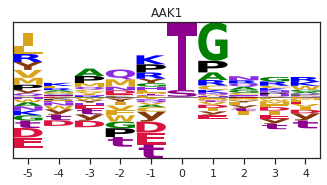

In [ ]:
raw2logo(df,'AAK1')

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()